### Исследование заведений общественного питания (визуализация результатов анализа данных)
--------------------------


<a id='start'></a>

#### Содержание

* [Презентация](https://yadi.sk/i/Yt6KjhDzTRx31w)
* [Файл с адресами](#msk_data)

 * [1. Предобработка](#1)
 * [2. Анализ данных](#2) 
 * [3. Выводы](#3)


#### 1. Предобработка данных
<a id='1'></a>

In [1]:
# Импортируем необходимые библиотеки 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Задание параметров для графиков в seaborn
plt.style.use('tableau-colorblind10')
sns.set_palette('colorblind')
sns.set_context("talk")
# Своя палитра
my_palette = ['#e15f41', '#786fa6', '#9b59b6', '#e74c3c', '#7f8c8d']

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
%matplotlib inline

# для полного отображения содержимого столбцов
pd.set_option('display.max_colwidth', -1)

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')

In [3]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [4]:
def df_look(df):
    """
    Функция для получения общей информации о датафрейме
    """
    print('Первые 3 строки датафрейма')
    print('-'*52)
    print('{}'.format(df.head(3)))
    print('='*52)
    print('Размер датафрейма: (строк:столбцов) {}'.format(df.shape))
    print('='*52)
    print('Типы данных и общая информация')
    print('-'*52)
    print(df.info())
    print('='*52)
    print('Наличие дубликатов')
    print('='*52)
    print(df.duplicated().sum())
    print('-'*52)
    print('Наличие пропусков')
    print('-'*52)
    print(df.isna().sum())
    print('='*52)

In [5]:
df_look(df)

Первые 3 строки датафрейма
----------------------------------------------------
       id      object_name chain object_type  \
0  151635  СМЕТАНА          нет   кафе         
1  77874   Родник           нет   кафе         
2  24309   Кафе «Академия»  нет   кафе         

                                             address  number  
0  город Москва, улица Егора Абакумова, дом 9         48      
1  город Москва, улица Талалихина, дом 2/1, корпус 1  35      
2  город Москва, Абельмановская улица, дом 6          95      
Размер датафрейма: (строк:столбцов) (15366, 6)
Типы данных и общая информация
----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2)

>Проведем пребразование к нижнему регистру

In [6]:
columns=['object_name', 'chain', 'object_type', 'address']
for column in columns:
    df[column] = df[column].str.lower()

In [7]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [8]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

>Заменим "предприятие быстрого обслуживания" на "пбо" и "магазин (отдел кулинарии)" на "магазин"

In [9]:
def replacer (df, col, old_value, new_value):
    for i in col:
        df[col] = df[col].replace(old_value, new_value)

In [10]:
replacer(df, 'object_type', 'магазин (отдел кулинарии)', 'магазин')
replacer(df, 'object_type', 'предприятие быстрого обслуживания', 'пбо')

In [11]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная', 'пбо', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин'], dtype=object)

проверим еще раз на дубликаты, они могли возникнуть после преобразования к нижнему регистру

In [12]:
df.duplicated().sum()

0

<a id='2'></a>
#### 2. Анализ данных
-----------
* Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
* Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
* Для какого вида объекта общественного питания характерно сетевое распространение?
* Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
* Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
* Выделите в отдельный столбец информацию об улице из столбца address.
* Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
* Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
* Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [13]:
# напишем функцию для построения графиков в seaborn
def grafoman(df, kind, x, y, hue, title_name, x_name, y_name, img_name, save):
    """
    grafoman(df, kind, x, y, hue, title_name, x_name, y_name, img_name, save)
    -Строит график (какой задается в параметре kind)
    -Сохраняет график в формате *.png
    
    Принимает на вход датафрейм - df
    kind - тип графика, может принимать значения:
            -'point', 'bar', 'strip', 
            -'swarm', 'box', 'violin', 'boxen'
    x, y - оси графика X и Y, соответственно
    hue - дополнительное информация
          для отображения 
    title_name, x_name, y_name - название графика и осей 
    img_name - название графика для сохранения
               сохраняет в формате *.png (если save==True)
               формат имени файла: 'image_{img_name}'
    save - принимает значение True (сохраняет) или False (не сохраняет)
    график в *.png
    """
    ax=sns.catplot(x=x, y=y, hue=hue, kind=kind, data=df, 
                   palette=my_palette, 
                   height=3.0, aspect=2.5)
    (ax
     .set_xticklabels(rotation=60)
     .set(title = title_name)
     .set(xlabel = x_name)
     .set(ylabel = y_name)
    )
    
    sns.despine()
    if save==True:
        plt.savefig(f'image_{img_name}.png', bbox_inches='tight', dpi=300, transparent=True)
    else:
        pass;

Далее во всех вызовах функции выставил параметр <code>save==False</code> (чтобы не было постоянного пересохранения картинок при перезапуске)

* **Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.**


In [14]:
# Группируем по типу объекта и типу распространения, считаем id для распределения по количеству
type_obj= (df
           .groupby(['object_type','chain'])['id']
           .count()
           .reset_index()
           .sort_values(by='id', ascending=True)
          )

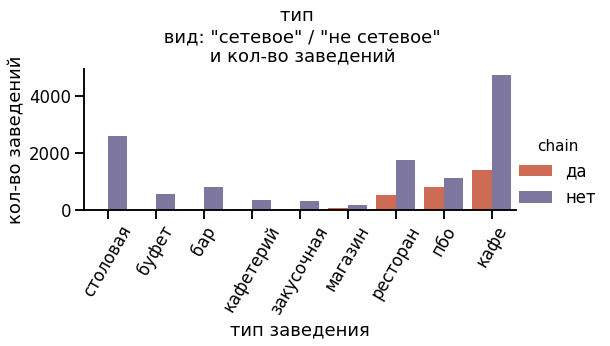

In [15]:
grafoman(type_obj, 'bar', 'object_type', 'id', 'chain',\
        'тип \n вид: "сетевое" / "не сетевое"\n и кол-во заведений',\
         'тип заведения', 'кол-во заведений', 1, False)

* **Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.**


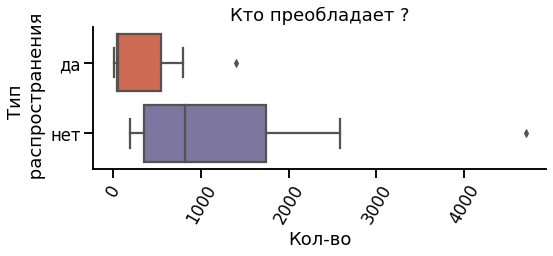

In [16]:
grafoman(type_obj, 'box', 'id', 'chain', None,\
        'Кто преобладает ?','Кол-во', 'Тип \n распространения', 2, False)

 * **Для какого вида объекта общественного питания характерно сетевое распространение?**


In [17]:
type_chain= (df
             .query('chain == "да"')
             .groupby('object_type')['id']
             .count()
             .reset_index()
             .sort_values(by='id', ascending=False)
            )

In [18]:
# доступ к докстрингу функции
#print(grafoman.__doc__)

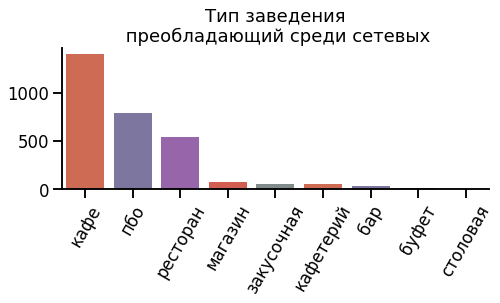

In [19]:
grafoman(type_chain, 'bar', 'object_type', 'id', None,\
         'Тип заведения\n преобладающий среди сетевых', '', '', 3, False)

**Вывод**
* Значительно преобладают несетевые объекты
* Среди сетевых лидерами по количеству являются: кафе, предприятия быстрого питания (пбо) и рестораны

* **Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?**


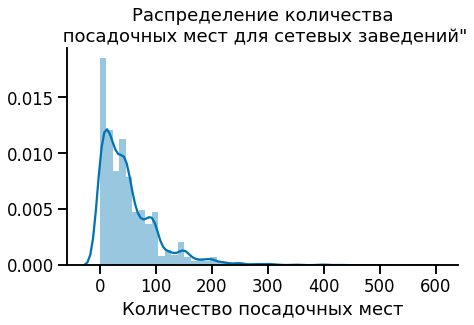

In [20]:
plt.figure(figsize=(7, 4))
ax = sns.distplot(df.query('chain=="да"')['number'], bins=50)
ax.set_title('Распределение количества\n посадочных мест для сетевых заведений"')
ax.set_xlabel('Количество посадочных мест')
ax.set_ylabel('')
sns.despine()
# тут сохранения просто закомментим
#plt.savefig(f'image_4.png', bbox_inches='tight', dpi=300, transparent=True);

**Вывод**
* Для сетевых характерно большое количество заведений с небольшим числом посадочных мест

* **Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.**


In [21]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


In [22]:
number_of_seats = (df
                   .groupby(['object_type', 'chain'])['number']
                   .mean()
                   .reset_index()
                   .sort_values(by='number', ascending=False)
)

In [23]:
number_of_seats

,object_type,chain,number
17,столовая,нет,130.267415
16,столовая,да,112.333333
14,ресторан,да,100.233456
15,ресторан,нет,95.771970
0,бар,да,53.027027
3,буфет,нет,51.865854
6,кафе,да,47.426934
1,бар,нет,43.063492
12,пбо,да,40.166877
7,кафе,нет,37.427174


In [24]:
#print(grafoman.__doc__)

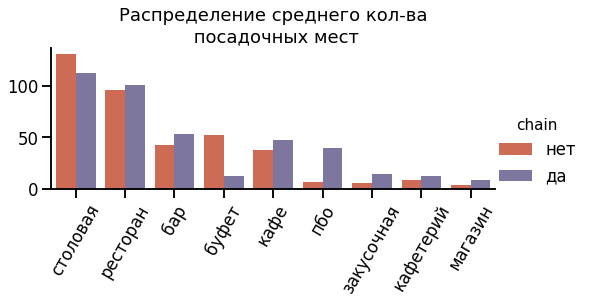

In [25]:
grafoman(number_of_seats, 'bar', 'object_type', 'number', 'chain', \
         'Распределение среднего кол-ва\n посадочных мест', '', '', 5, False)

Самое большое количество посадочных мест (среднее значение) предлагают столовые (112-130 мест),  
затем идут рестораны (95-100) и бары (51-53)

* **Выделите в отдельный столбец информацию об улице из столбца address.**


In [26]:
df['street_name'] = df['address'].str.split(r',', expand=True)[1]

In [27]:
df.head()

,id,object_name,chain,object_type,address,number,street_name
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


Для того чтобы продолжить выполнение задания нужно дополнить исходные данные информацией о принадлежности адреса к определенному округу
<a id='msk_data'></a>

>Таблица **'msk_data.xlsx'** была получена при обработке базы '.xlsx' с сайта (https://data.mos.ru/datasets/60562) (открытые данные правительства Москвы). В исходной таблице оставил только нужные столбцы (адрес,  административный округ, округ, улица) и привел все записи к нижнему регистру, полученную таблицу ('msk_data.xlsx') загрузил в корневую папку с проектом и на Яндекс.Диск

Ссылка на файл c данными: [msk_data.xlsx](https://yadi.sk/d/bYdJbTmG8JiUbw)

In [28]:
msk_data = pd.read_excel('msk_data.xlsx')

In [29]:
msk_data.head(3)

,Unnamed: 0,address,adm_area,district,street_name
0,0,"город москва, варшавское шоссе, дом 150, строение 2",южный административный округ,муниципальный округ чертаново южное,варшавское шоссе
1,1,"город москва, косинская улица, дом 26а",восточный административный округ,муниципальный округ вешняки,косинская улица
2,2,"город москва, гороховский переулок, дом 21",центральный административный округ,муниципальный округ басманный,гороховский переулок


In [30]:
# Удаляем столбцы 'Unnamed: 0', 'street_name'
msk_data = msk_data.drop(['Unnamed: 0', 'street_name'], axis=1)
msk_data.head(3)

,address,adm_area,district
0,"город москва, варшавское шоссе, дом 150, строение 2",южный административный округ,муниципальный округ чертаново южное
1,"город москва, косинская улица, дом 26а",восточный административный округ,муниципальный округ вешняки
2,"город москва, гороховский переулок, дом 21",центральный административный округ,муниципальный округ басманный


In [31]:
df = df.merge(msk_data, on='address', how='inner')

In [32]:
df.head()

,id,object_name,chain,object_type,address,number,street_name,adm_area,district
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,северо-восточный административный округ,муниципальный округ ярославский
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,центральный административный округ,муниципальный округ таганский
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,центральный административный округ,муниципальный округ таганский
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица,северо-восточный административный округ,муниципальный округ лианозово
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,северо-восточный административный округ,муниципальный округ лианозово


In [33]:
df_look(df)

Первые 3 строки датафрейма
----------------------------------------------------
       id      object_name chain object_type  \
0  151635  сметана          нет   кафе         
1  77874   родник           нет   кафе         
2  24309   кафе «академия»  нет   кафе         

                                             address  number  \
0  город москва, улица егора абакумова, дом 9         48       
1  город москва, улица талалихина, дом 2/1, корпус 1  35       
2  город москва, абельмановская улица, дом 6          95       

              street_name                                 adm_area  \
0   улица егора абакумова  северо-восточный административный округ   
1   улица талалихина       центральный административный округ        
2   абельмановская улица   центральный административный округ        

                          district  
0  муниципальный округ ярославский  
1  муниципальный округ таганский    
2  муниципальный округ таганский    
Размер датафрейма: (строк:столбцов) (1527

**Нужно удалить дубликаты** 

In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15248 entries, 0 to 15273
Data columns (total 9 columns):
id             15248 non-null int64
object_name    15248 non-null object
chain          15248 non-null object
object_type    15248 non-null object
address        15248 non-null object
number         15248 non-null int64
street_name    15248 non-null object
adm_area       15248 non-null object
district       15248 non-null object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


* **Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?**


In [36]:
top_objects_count = (df
                     .groupby('street_name', as_index=False)
                     .agg({'id':'count', 'district':'max'})
                     .sort_values(by='id', ascending=False)
                     .rename(columns={'id':'id_count_top'})
                    )

In [37]:
top_objects_count.head(10)

,street_name,id_count_top,district
482,город зеленоград,229,муниципальный округ старое крюково
1072,проспект мира,204,муниципальный округ ярославский
1076,профсоюзная улица,181,муниципальный округ ясенево
698,ленинградский проспект,171,муниципальный округ хорошевский
1033,пресненская набережная,167,муниципальный округ пресненский
416,варшавское шоссе,161,муниципальный округ южное бутово
701,ленинский проспект,147,муниципальный округ якиманка
1022,поселение сосенское,138,поселение сосенское
1069,проспект вернадского,132,муниципальный округ тропарево-никулино
689,кутузовский проспект,114,муниципальный округ фили-давыдково


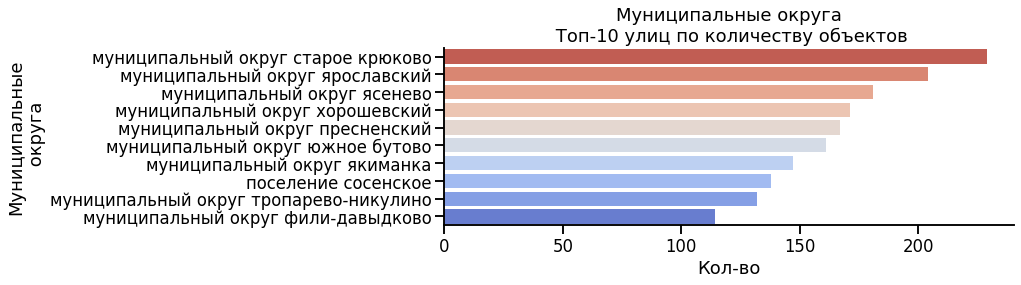

In [38]:
ax=sns.catplot(x='id_count_top', y='district', 
               kind='bar', data=top_objects_count.head(10), 
                   palette='coolwarm_r', 
                   height=3.5, aspect=4)
(ax
 .set_xticklabels(rotation=0)
 .set(title = 'Муниципальные округа\n Топ-10 улиц по количеству объектов')
 .set(ylabel = 'Муниципальные\n округа')
 .set(xlabel = 'Кол-во')
)

sns.despine()
# также комментим сохранение 
#plt.savefig('image_6.png', bbox_inches='tight', dpi=300, transparent=True);
    

**Вывод**
* Улицы с большим кол-вом объектов распределены по всему городу, пожалуй за исключением восточной и юго-восточной части Москвы

* **Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?**


In [39]:
amount = top_objects_count.query('id_count_top==1').count()[1]
print(f'В Москве: {amount} улиц с одним объектом общественного питания')

В Москве: 540 улиц с одним объектом общественного питания


In [40]:
one_obj_district = (top_objects_count
                    .query('id_count_top==1')
                    .groupby(['district'])
                    # 'id_count_top':'sum' покажет в каких районах больше всего улиц 
                    #  с одним объектом общественного питания
                    .agg({'id_count_top':'sum'})
                    .sort_values(by='id_count_top', ascending=False)
                    .reset_index()
                   )

In [41]:
one_obj_district.head(10)

,district,id_count_top
0,муниципальный округ таганский,28
1,муниципальный округ хамовники,26
2,муниципальный округ басманный,22
3,муниципальный округ тверской,20
4,муниципальный округ пресненский,19
5,муниципальный округ марьина роща,17
6,муниципальный округ сокольники,15
7,муниципальный округ мещанский,13
8,муниципальный округ лефортово,12
9,муниципальный округ замоскворечье,12


In [42]:
print(grafoman.__doc__)


    grafoman(df, kind, x, y, hue, title_name, x_name, y_name, img_name, save)
    -Строит график (какой задается в параметре kind)
    -Сохраняет график в формате *.png
    
    Принимает на вход датафрейм - df
    kind - тип графика, может принимать значения:
            -'point', 'bar', 'strip', 
            -'swarm', 'box', 'violin', 'boxen'
    x, y - оси графика X и Y, соответственно
    hue - дополнительное информация
          для отображения 
    title_name, x_name, y_name - название графика и осей 
    img_name - название графика для сохранения
               сохраняет в формате *.png (если save==True)
               формат имени файла: 'image_{img_name}'
    save - принимает значение True (сохраняет) или False (не сохраняет)
    график в *.png
    


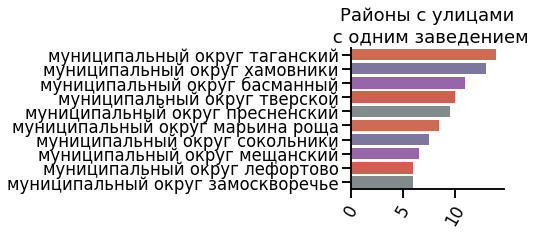

In [43]:
grafoman(one_obj_district.head(10), 'bar', 'id_count_top', 'district', None, \
         'Районы с улицами\n с одним заведением', '', '', 7, False)

**Вывод:**
* Довольно четко прослеживается зависимость что больше всего улиц с одним объектом общественного питания в центре города
* скорее всего это обусловлено длиной улиц в центре и трудностью подбора подходящего под кафе/ресторан помещения в старых зданиях 

* **Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?**

In [44]:
top_objects_count.head()

,street_name,id_count_top,district
482,город зеленоград,229,муниципальный округ старое крюково
1072,проспект мира,204,муниципальный округ ярославский
1076,профсоюзная улица,181,муниципальный округ ясенево
698,ленинградский проспект,171,муниципальный округ хорошевский
1033,пресненская набережная,167,муниципальный округ пресненский


In [45]:
top_10_objects = top_objects_count.head(10)

In [46]:
top_10_objects = top_10_objects.drop(['district', 'id_count_top'], axis=1)

In [47]:
top_10_objects

,street_name
482,город зеленоград
1072,проспект мира
1076,профсоюзная улица
698,ленинградский проспект
1033,пресненская набережная
416,варшавское шоссе
701,ленинский проспект
1022,поселение сосенское
1069,проспект вернадского
689,кутузовский проспект


In [48]:
top_10_streets_and_seats = top_10_objects.merge(df, on='street_name', how='left')

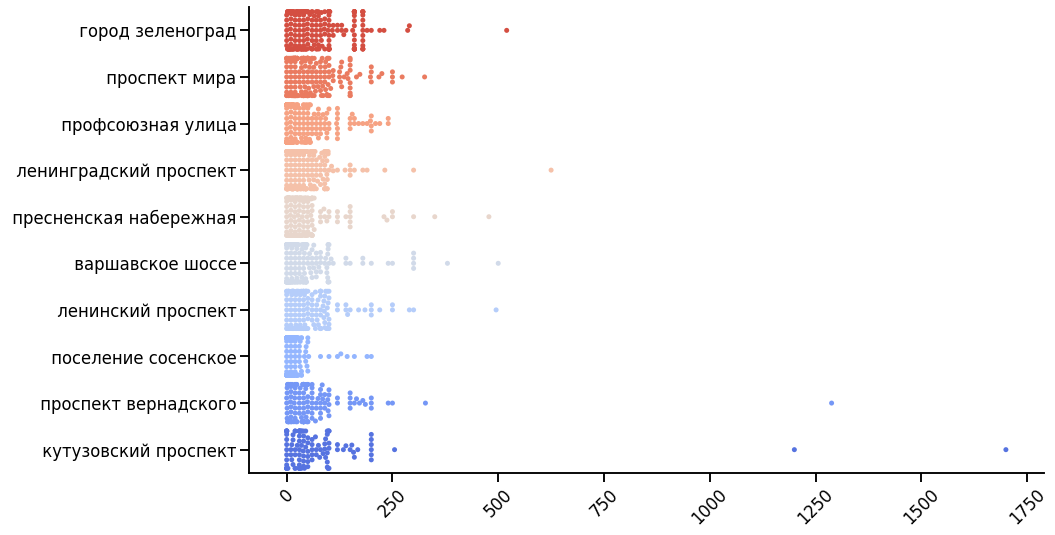

In [49]:
ax=sns.catplot(y='street_name', x='number', 
               kind='swarm', data=top_10_streets_and_seats, 
                   palette='coolwarm_r', 
                   height=7.5, aspect=2)
(ax
 .set_xticklabels(rotation=45)
 .set(title = '')
 .set(ylabel = '')
 .set(xlabel = '')
)

sns.despine()
# комментим сохранение
#plt.savefig('image_8.png', bbox_inches='tight', dpi=300, transparent=True);

In [50]:
top_10_streets_and_seats.query('number >=250')

,street_name,id,object_name,chain,object_type,address,number,adm_area,district
86,город зеленоград,28600,столовая миэт,нет,столовая,"город москва, город зеленоград, площадь шокина, дом 1",520,зеленоградский административный округ,муниципальный округ старое крюково
98,город зеленоград,59380,корчма диканька,нет,ресторан,"город москва, город зеленоград, савёлкинский проезд, дом 12",286,зеленоградский административный округ,муниципальное образование савелки
157,город зеленоград,124698,столовая в школе 2045 корп. 2312,нет,столовая,"город москва, город зеленоград, корпус 2312",290,зеленоградский административный округ,муниципальный округ крюково
297,проспект мира,27015,банкетный зал «галактика»,нет,ресторан,"город москва, проспект мира, дом 150",250,северо-восточный административный округ,муниципальный округ алексеевский
298,проспект мира,27016,банкетный зал «вечерний-космос»,нет,ресторан,"город москва, проспект мира, дом 150",250,северо-восточный административный округ,муниципальный округ алексеевский
327,проспект мира,25237,му-му,да,кафе,"город москва, проспект мира, дом 114б, строение 2",273,северо-восточный административный округ,муниципальный округ алексеевский
364,проспект мира,23127,кафе в кинотеатре люксор,нет,кафе,"город москва, проспект мира, дом 211, корпус 2",250,северо-восточный административный округ,муниципальный округ свиблово
425,проспект мира,175475,мандариновый гусь,нет,ресторан,"город москва, проспект мира, дом 99",326,северо-восточный административный округ,муниципальный округ останкинский
725,ленинградский проспект,69359,эликсир,нет,столовая,"город москва, ленинградский проспект, дом 31а, строение 1",300,северный административный округ,муниципальный округ беговой
730,ленинградский проспект,27033,банкетный,нет,ресторан,"город москва, ленинградский проспект, дом 31а, строение 1",625,северный административный округ,муниципальный округ беговой


**Больше 250 посадочных мест уже редкость**

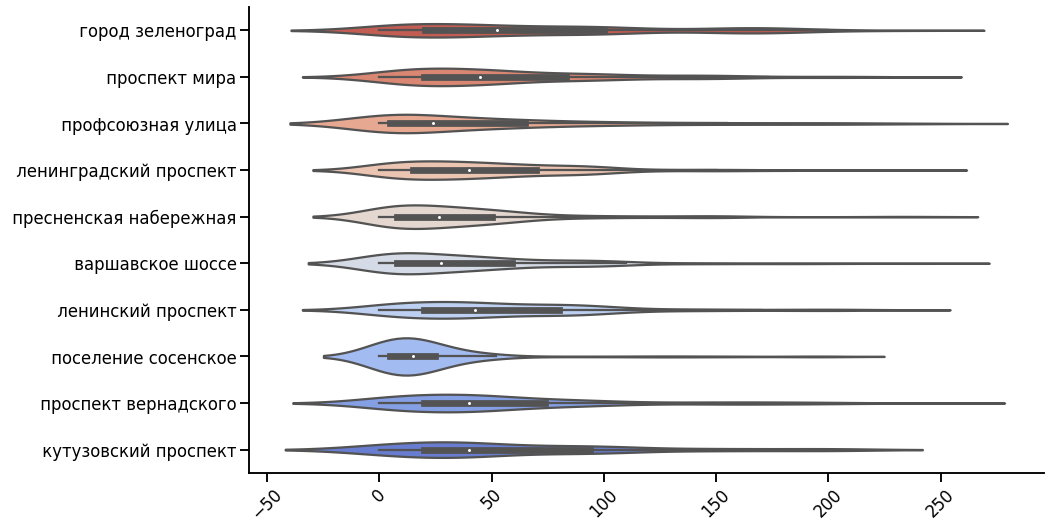

In [51]:
ax=sns.catplot(y='street_name', x='number', 
               kind='violin', data=top_10_streets_and_seats.query('number<250'), 
                   palette='coolwarm_r', 
                   height=7.5, aspect=2)
(ax
 .set_xticklabels(rotation=45)
 .set(title = '')
 .set(ylabel = '')
 .set(xlabel = '')
)

sns.despine()
# комментим сохранение
#plt.savefig('image_9.png', bbox_inches='tight', dpi=300, transparent=True);

In [52]:
top_10_streets_and_seats['number'].median()

38.0

**Вывод:**
* Количество посадочных мест на улицах где много объектов общепита (Топ-10) находится в интервале от 0 до 50 (медианное значение), сами улицы представляют собой длиные проспекты проходящие через весь город, или бОльшую его часть (преимущественно юг Москвы). Лидером по количеству объектов и медианному значению количества посадочных мест является город Зеленоград, также представлена Новая Москва (поселение Сосенское 8-е место в Топ-10). Присутствие пресненской набережной в Топ-10 на 5-ом месте, вероятно обусловлено тем, что в Москва-Сити много различных заведений общепита.
* Смещение распределения вправо (в сторону больших значений) говорит о том, что на каждой улице есть небольшое количество заведений с большим числом посадочных мест (см swarmplot) - это большие банкетные залы ориентированные именно на банкет/корпоратив и т.д., а не на повседневное обслуживание.

<a id='3'></a>
#### 3. Выводы
-------------------------------
 * Значительно преобладают несетевые объекты. Среди сетевых лидерами по количеству являются: кафе, предприятия быстрого питания (пбо) и рестораны
 * Самое большое количество посадочных мест (среднее значение) предлагают столовые (112-130 мест), затем идут рестораны (95-100) и бары (51-53)
 * Улицы с большим кол-вом объектов распределены по всему городу, пожалуй за исключением восточной и юго-восточной части Москвы
 * Больше всего улиц с одним объектом общественного питания в центре города, скорее всего это обусловлено длиной улиц в центре и трудностью подбора подходящего под кафе/ресторан помещения в старых зданиях
---------------------------------
* Количество посадочных мест на улицах где много объектов общепита (Топ-10) находится в интервале от 0 до 50 (медианное значение), сами улицы представляют собой длиные проспекты проходящие через весь город, или бОльшую его часть (преимущественно юг Москвы). Лидером по количеству объектов и медианному значению количества посадочных мест является город Зеленоград, также представлена Новая Москва (поселение Сосенское 8-е место в Топ-10). Присутствие пресненской набережной в Топ-10 на 5-ом месте, вероятно обусловлено тем, что в Москва-Сити много различных заведений общепита.
* Смещение распределения вправо (в сторону больших значений) говорит о том, что на каждой улице есть небольшое количество заведений с большим числом посадочных мест (см swarmplot) - скорее всего это большие банкетные залы ориентированные именно на банкет/корпоратив и т.д., а не на повседневное обслуживание.
 
> **Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети**.  
>Рекомендации:
* Вид заведения: кафе / ресторан
* Посадочных мест: не более 35-45 мест
* Район расположения: Я бы выбрал Пресненский район, а именно Москва-Сити -- кажется, что там аудитории с деньгами и интересуется различными новинками
* Аудиторию нужно исследовать отдельно, в кафе с роботами пойдут не все, по крайней мере далеко не все станут постоянными посетителями. 
* Развитие сети возможно, однако нужно подбирать места ближе к месту расположения бизнес центров с офисами технологических компаний и стартапов, предполагаю, что целевой аудиторией будут люди интересующиеся технологическими новинками ("гики").

[Вернуться в начало](#start)